<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](./data/train/mountain/art1131.jpg)|![](./data/validation/forest/cdmc317.jpg)|

The problem is realively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several differnet possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = res.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

## Load in Data

![skimage-logo](https://scikit-image.org/_static/img/logo.png)

Check out out [`skimage`](https://scikit-image.org/) for useful functions related to processing the images. In particular checkout the documentation for `skimage.io.imread_collection` and `skimage.transform.resize`.

In [1]:
# imports

import numpy as np
import os, sys

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
from time import time
from time import sleep

Working with 328 images
Image examples: 
for77.jpg


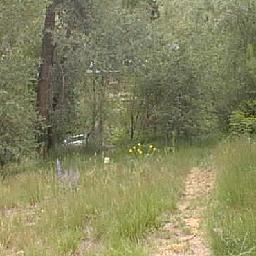

for22.jpg


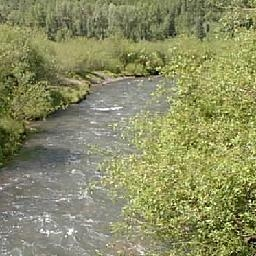

In [32]:
# Load up forests 

forest = "./data/train/forest"

forest_pics = [f for f in os.listdir(forest) if os.path.isfile(os.path.join(
    forest, f)) and f[-3:] == 'jpg']

print("Working with {0} images".format(len(forest_pics)))
print("Image examples: ")

for i in range(40, 42):
    print(forest_pics[i])
    display(_Imgdis(filename=forest + "/" + forest_pics[i], width=240, height=320))

Working with 374 images
Image examples: 
land4.jpg


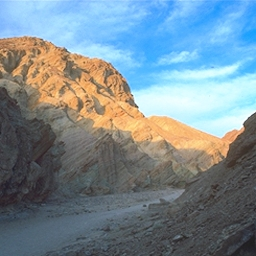

land22.jpg


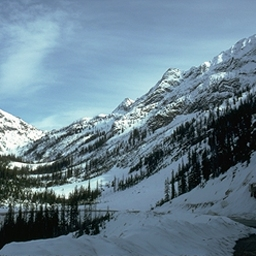

In [33]:
# Load up mountains

mountain = "./data/train/mountain"

mountain_pics = [f for f in os.listdir(mountain) if os.path.isfile(
    os.path.join(mountain, f)) and f[-3:] == 'jpg']

print("Working with {0} images".format(len(mountain_pics)))
print("Image examples: ")

for i in range(40, 42):
    print(mountain_pics[i])
    display(_Imgdis(filename=mountain + "/" + mountain_pics[i], width=240, height=320))

In [34]:
# trying out skimage

import matplotlib.pyplot as plt
import skimage
from skimage.io import imread, imread_collection, imshow_collection, imshow

In [35]:
# image list mountain

img_list_mountain = []
for img in os.listdir(mountain):
    if img[-3:] == 'jpg':
        img_list_mountain.append(skimage.io.imread(f'./data/train/mountain/{img}'))

In [36]:
# image list forest

img_list_forest = []
for img in os.listdir(forest):
    if img[-3:] == 'jpg':
        img_list_forest.append(skimage.io.imread(f'./data/train/forest/{img}'))

In [37]:
img_list_mountain[0].shape, img_list_forest[0].shape

((256, 256, 3), (256, 256, 3))

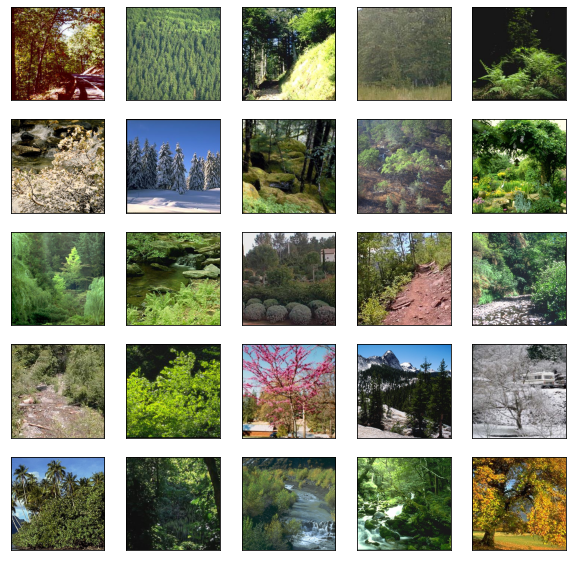

In [38]:
# visualize forest set

# Visualizing the forest set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list_forest[i], cmap=plt.cm.binary)
plt.show()

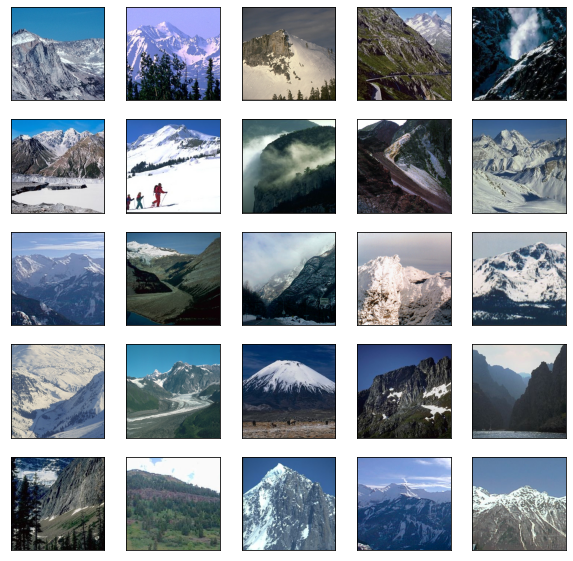

In [39]:
# visualize mountain set

# Visualizing the mountain set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list_mountain[i], cmap=plt.cm.binary)
plt.show()

In [40]:
# resize using skimage resize

from skimage import data
from skimage.transform import resize

forest_resized = []
for img in img_list_forest:
    new_img = img.copy()
    new_img = resize(new_img, (224, 224))
    forest_resized.append(new_img)

mountain_resized = []
for img in img_list_mountain:
    new_img = img.copy()
    new_img = resize(new_img, (224, 224))
    mountain_resized.append(new_img)

# Testing execution of above code: 
forest_resized[0].shape, mountain_resized[0].shape

((224, 224, 3), (224, 224, 3))

In [41]:
# set up classes (positive mountain, negative forest)

mountain_array = np.array(mountain_resized)
y_mountain = np.ones((mountain_array.shape[0],1))

forest_array = np.array(forest_resized)
y_forest = np.zeros((forest_array.shape[0], 1))

y_mountain.shape, y_forest.shape

((374, 1), (328, 1))

In [42]:
# Combining classified sets into one
from sklearn.model_selection import train_test_split

X = np.concatenate((mountain_array, forest_array))
y = np.concatenate((y_mountain, y_forest))

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((561, 224, 224, 3), (561, 1), (141, 224, 224, 3), (141, 1))

## Instatiate Model

In [44]:
resnet = ResNet50(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_mountain(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'mountain':
      return entry[2]
  return 0.0

In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# haha wow thats a lot of params

## Fit Model

In [48]:
# fit model on train and val (test set is val)

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 561 samples, validate on 141 samples
Epoch 1/10
561/561 [==============================] - 52s 92ms/sample - loss: 0.4321 - accuracy: 0.8485 - val_loss: 0.7588 - val_accuracy: 0.4397
Epoch 2/10
561/561 [==============================] - 52s 93ms/sample - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.6749 - val_accuracy: 0.5603
Epoch 3/10
561/561 [==============================] - 53s 94ms/sample - loss: 0.0216 - accuracy: 0.9947 - val_loss: 0.7007 - val_accuracy: 0.5603
Epoch 4/10
561/561 [==============================] - 52s 93ms/sample - loss: 0.0131 - accuracy: 0.9947 - val_loss: 0.7098 - val_accuracy: 0.5603
Epoch 5/10
561/561 [==============================] - 55s 98ms/sample - loss: 0.0210 - accuracy: 0.9911 - val_loss: 0.6746 - val_accuracy: 0.5603
Epoch 6/10
561/561 [==============================] - 62s 110ms/sample - loss: 0.0314 - accuracy: 0.9875 - val_loss: 0.6915 - val_accuracy: 0.5603
Epoch 7/10
561/561 [==============================] - 51s 90ms/sample - loss:

In [49]:
# hmm val accuracy plateaued pretty early
# If I continue to improve I should implement early stopping this took a while

# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

In [57]:
# imports

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# willy nilly model (just kidding its the one we did in class)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [60]:
# Compile Model

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [61]:
# Fit Model

model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_test, y_test))

Train on 561 samples, validate on 141 samples
Epoch 1/10
561/561 [==============================] - 21s 37ms/sample - loss: 1.2596 - accuracy: 0.7041 - val_loss: 0.2762 - val_accuracy: 0.9078
Epoch 2/10
561/561 [==============================] - 24s 43ms/sample - loss: 0.2243 - accuracy: 0.9287 - val_loss: 0.1427 - val_accuracy: 0.9433
Epoch 3/10
561/561 [==============================] - 24s 43ms/sample - loss: 0.1816 - accuracy: 0.9287 - val_loss: 0.1575 - val_accuracy: 0.9504
Epoch 4/10
561/561 [==============================] - 24s 44ms/sample - loss: 0.1461 - accuracy: 0.9447 - val_loss: 0.1363 - val_accuracy: 0.9504
Epoch 5/10
561/561 [==============================] - 25s 44ms/sample - loss: 0.1101 - accuracy: 0.9519 - val_loss: 0.1218 - val_accuracy: 0.9504
Epoch 6/10
561/561 [==============================] - 25s 44ms/sample - loss: 0.0737 - accuracy: 0.9733 - val_loss: 0.2731 - val_accuracy: 0.9149
Epoch 7/10
561/561 [==============================] - 25s 44ms/sample - loss: 

# Custom CNN Model with Image Manipulations
## *This a stretch goal, and it's relatively difficult*

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 

In [ ]:
# State Code for Image Manipulation Here

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language